<h1 style="color:#ff603b; font-family:Ewert; font-size:120%;" class="font-effect-3d">Code Library, Style, & Links</h1>

[Google Colaboratory Version](https://colab.research.google.com/drive/16Xh8T4fPuk0AIBjnCo7e9WTrF1PgukoF)

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d');
span {font-family:'Roboto'; color:black; text-shadow:3px 3px 3px #999;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:#ff603b;}      
</style>

In [2]:
import warnings; warnings.filterwarnings('ignore')
import numpy as np,pandas as pd,scipy as sp
import pylab as pl,seaborn as sn
import os,json,cv2,h5py
import keras as ks,tensorflow as tf
from PIL import ImageFile
from tqdm import tqdm
from skimage import io
print(os.listdir("../input"))

Using TensorFlow backend.


['keras-applications-weights', 'image-examples-for-mixed-styles', 'yale-face-database', 'haarcascades', 'flower-color-images', 'classification-of-handwritten-letters', 'resnet50']


In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing import sequence as ksequence
from keras.preprocessing import image as kimage
from keras.utils import to_categorical
from keras.models import Model,Sequential,load_model
from keras.layers import Dense,Activation,\
Dropout,Flatten,Conv2D,MaxPooling2D,\
GlobalMaxPooling2D,GlobalAveragePooling2D,\
Input,Conv1D,MaxPooling1D,LSTM
from keras.layers.embeddings import Embedding
from keras.layers.advanced_activations import PReLU,LeakyReLU
from keras.callbacks import ModelCheckpoint,\
ReduceLROnPlateau,EarlyStopping

In [4]:
def loss_plot(fit_history):
    pl.figure(figsize=(10,3))
    pl.plot(fit_history.history['loss'],label='train')
    pl.plot(fit_history.history['val_loss'],label='test')
    pl.legend(); pl.title('Loss Function');   
def mae_plot(fit_history):
    pl.figure(figsize=(10,3))
    pl.plot(fit_history.history['mean_absolute_error'],label='train')
    pl.plot(fit_history.history['val_mean_absolute_error'],label='test')
    pl.legend(); pl.title('Mean Absolute Error'); 
def acc_plot(fit_history):
    pl.figure(figsize=(10,3))
    pl.plot(fit_history.history['acc'],label='train')
    pl.plot(fit_history.history['val_acc'],label='test')
    pl.legend(); pl.title('Accuracy'); 

In [5]:
def prepro(x_train,y_train,x_test,y_test):
    N=y_train.shape[0]; shuffle_ids=np.arange(N)
    np.random.RandomState(23).shuffle(shuffle_ids)
    x_train,y_train=\
    x_train[shuffle_ids],y_train[shuffle_ids]
    n=int(len(x_test)/2)
    x_valid,y_valid=x_test[:n],y_test[:n]
    x_test,y_test=x_test[n:],y_test[n:]
    print(x_train.shape,x_valid.shape,x_test.shape)
    print(y_train.shape,y_valid.shape,y_test.shape)
    print('Label: ',y_train[1][0])
    pl.figure(figsize=(3,3)); 
    pl.xticks([]); pl.yticks([])
    pl.imshow(x_train[1],cmap='bone'); pl.show()
    return [x_train,y_train,x_valid,y_valid,x_test,y_test]

<h1 style="color:#ff603b; font-family:Ewert; font-size:120%;" class="font-effect-3d">Backend</h1>

In [6]:
print(ks.__version__)
# variants: theano, tensorflow, cntk
ks.backend.backend(),\
ks.backend.image_dim_ordering()

2.2.4


('tensorflow', 'tf')

<h1 style="color:#ff603b; font-family:Ewert; font-size:120%;" class="font-effect-3d">Data</h1>
<h2>internal datasets</h2>
variants: cifar10, cifar100, imdb, reuters, mnist, fashion_mnist, boston_housing

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (5000, 32, 32, 3) (5000, 32, 32, 3)
(50000, 1) (5000, 1) (5000, 1)
Label:  7


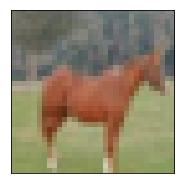

In [7]:
# 32x32 color images; labeled over 10 categories
# 50,000 - the train set; 10,000 - the test set
(x_train1,y_train1),(x_test1,y_test1)=\
ks.datasets.cifar10.load_data()
[x_train1,y_train1,x_valid1,y_valid1,x_test1,y_test1]=\
prepro(x_train1,y_train1,x_test1,y_test1)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (5000, 28, 28) (5000, 28, 28)
(60000, 1) (5000, 1) (5000, 1)
Label:  0


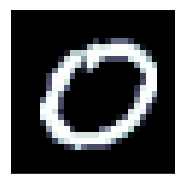

In [8]:
# 28x28 grayscale images; labeled over 10 categories
# 55,000 - the train set; 10,000 - the test set
(x_train2,y_train2),(x_test2,y_test2)=\
ks.datasets.mnist.load_data()
[x_train2,y_train2,x_valid2,y_valid2,x_test2,y_test2]=\
prepro(x_train2,y_train2.reshape(-1,1),
       x_test2,y_test2.reshape(-1,1))

In [9]:
# 18000 newsgroups posts on 20 topics
train=fetch_20newsgroups(subset='train',shuffle=True,
                         remove=('headers','footers','quotes'))
test=fetch_20newsgroups(subset='test',shuffle=True,
                        remove=('headers','footers','quotes'))
y_train3,y_test3=train.target,test.target
vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=.5,
                           stop_words='english')
x_train3=vectorizer.fit_transform(train.data) 
x_test3=vectorizer.transform(test.data)
del train,test
x_test3,x_valid3,y_test3,y_valid3=\
train_test_split(x_test3,y_test3,
                 test_size=.5,random_state=1)
print(x_train3.shape,x_valid3.shape,x_test3.shape)
print('Label: ',y_train3[1]) 
print('Sequence of word indexes: \n',x_train3[1])

(11314, 101322) (3766, 101322) (3766, 101322)
Label:  4
Sequence of word indexes: 
   (0, 31927)	0.09047140546465948
  (0, 39296)	0.1270498791022587
  (0, 66680)	0.08760497367334341
  (0, 23973)	0.17002519748787917
  (0, 83779)	0.1611030246015933
  (0, 92389)	0.15596867101914402
  (0, 82337)	0.149185570783794
  (0, 27889)	0.21773415378419708
  (0, 68519)	0.17126924074876296
  (0, 81848)	0.1400199120757977
  (0, 38637)	0.2349094316272378
  (0, 72039)	0.28043456255303295
  (0, 81378)	0.09557715842759543
  (0, 24125)	0.14730622500536728
  (0, 60923)	0.1037907683672198
  (0, 33127)	0.18059866666366173
  (0, 73122)	0.14599105589051786
  (0, 84088)	0.175848477889496
  (0, 20236)	0.18992809257856047
  (0, 30233)	0.13398312143926927
  (0, 75904)	0.15407643854453287
  (0, 16791)	0.1823775875595039
  (0, 25769)	0.11704456707539097
  (0, 16776)	0.16772235763004084
  (0, 45997)	0.13555253839447046
  (0, 82666)	0.18721799969210928
  (0, 47310)	0.13555253839447046
  (0, 92588)	0.14642114683210833
  

57344/57026 [==============================] - 0s 1us/step
(404, 13) (51, 13) (51, 13)
(404,) (51,) (51,)
Target value:  42.3
Features' values: 
 [2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00]


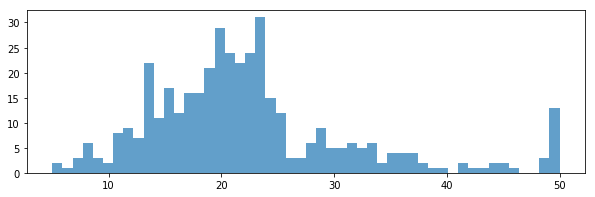

In [10]:
# 13 attributes of houses at different locations, 
# targets are the median values of the houses at a location (in k$)
(x_train4,y_train4),(x_test4,y_test4)=\
ks.datasets.boston_housing.load_data()
n=int(len(x_test4)/2)
x_valid4,y_valid4=x_test4[:n],y_test4[:n]
x_test4,y_test4=x_test4[n:],y_test4[n:]
print(x_train4.shape,x_valid4.shape,x_test4.shape)
print(y_train4.shape,y_valid4.shape,y_test4.shape)
print('Target value: ',y_train4[1])
print("Features' values: \n",x_train4[1])
pl.figure(figsize=(10,3))
pl.hist(y_train4,bins=50,alpha=.7);

<h2>artificial datasets</h2>

(4000, 2) (500, 2) (500, 2)
(4000,) (500,) (500,)
Label:  0
Features: 
 [-0.68760779 -0.88166915]


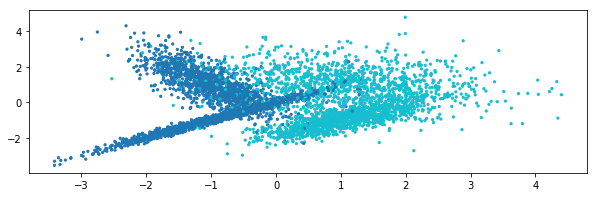

In [11]:
# the artificial sets for classification, labeled over 2 categories 
X5,Y5=make_classification(n_samples=5000,n_features=2,
                          n_redundant=0,n_informative=2)
x_train5,x_test5,y_train5,y_test5=\
train_test_split(X5,Y5,test_size=.2,random_state=1)
n=int(len(x_test5)/2)
x_valid5,y_valid5=x_test5[:n],y_test5[:n]
x_test5,y_test5=x_test5[n:],y_test5[n:]
print(x_train5.shape,x_valid5.shape,x_test5.shape)
print(y_train5.shape,y_valid5.shape,y_test5.shape)
print('Label: ',y_train5[1])
print('Features: \n',x_train5[1])
pl.figure(figsize=(10,3))
pl.scatter(X5[:,0],X5[:,1],marker='o',
           s=5,c=Y5,cmap='tab10');

<h2>external datasets</h2>

In [12]:
# 150x150 grayscale face images; 
# labeled over 15 categories(persons)
yalefaces_paths=[]; yalefaces_images=[]
yalefaces_labels=[]; yalefaces_cut_images=[]
folder="../input/yale-face-database/data/"
cascade="../input/haarcascades/"+\
        "haarcascade_frontalface_default.xml"
for element in os.listdir(folder):
    if element!='Readme.txt':
        yalefaces_paths.append(os.path.join(folder,element))
for path in yalefaces_paths:
    image=io.imread(path,as_gray=True)
    yalefaces_images.append(image)
    label=int(os.path.split(path)[1].split(".")[0]\
              .replace("subject",""))-1
    yalefaces_labels.append(label)    
face_detector=cv2.CascadeClassifier(cascade)
for i in range(len(yalefaces_images)):
    image=yalefaces_images[i]
    face=face_detector.detectMultiScale(image)
    x,y=face[0][:2]
    cut_image=image[y:y+150,x:x+150]
    yalefaces_cut_images.append(cut_image)        
yalefaces_labels=np.array(yalefaces_labels).reshape(-1,1)
yalefaces_cut_images=np.array(yalefaces_cut_images)/255

(132, 150, 150) (16, 150, 150) (17, 150, 150)
(132, 1) (16, 1) (17, 1)
Label:  0


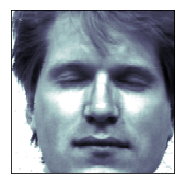

In [13]:
x_train6,x_test6,y_train6,y_test6=\
train_test_split(yalefaces_cut_images,
                 yalefaces_labels,
                 test_size=.2,random_state=1)
[x_train6,y_train6,x_valid6,y_valid6,x_test6,y_test6]=\
prepro(x_train6,y_train6,x_test6,y_test6)

In [14]:
# 128x128 flower color images; labeled over 10 categories
# 189 - the train set; 21 - the test set
fpath="../input/flower-color-images/flower_images/flower_images/"
flowers=pd.read_csv(fpath+"flower_labels.csv")
flower_files=flowers['file']
flower_targets=flowers['label'].values.reshape(-1,1)
def path_to_tensor(img_path):
    img=kimage.load_img(fpath+img_path,
                        target_size=(128,128))
    x=kimage.img_to_array(img)
    return np.expand_dims(x,axis=0)
def paths_to_tensor(img_paths):
    list_of_tensors=[path_to_tensor(img_path) 
                     for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)
ImageFile.LOAD_TRUNCATED_IMAGES = True                 
flower_tensors=paths_to_tensor(flower_files)/255;

100%|██████████| 210/210 [00:00<00:00, 257.55it/s]


(189, 128, 128, 3) (10, 128, 128, 3) (11, 128, 128, 3)
(189, 1) (10, 1) (11, 1)
Label:  2


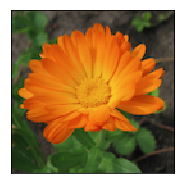

In [15]:
x_train7,x_test7,y_train7,y_test7=\
train_test_split(flower_tensors,flower_targets,
                 test_size=.1,random_state=1)
[x_train7,y_train7,x_valid7,y_valid7,x_test7,y_test7]=\
prepro(x_train7,y_train7,x_test7,y_test7)

(11352, 32, 32, 3) (1419, 32, 32, 3) (1419, 32, 32, 3)
(11352, 1) (1419, 1) (1419, 1)
Label:  24


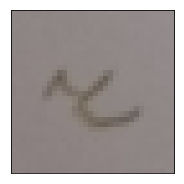

In [16]:
fpath2='../input/classification-of-handwritten-letters/'
f=h5py.File(fpath2+'LetterColorImages_123.h5','r') 
keys=list(f.keys())
letters=u'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
letter_images=np.array(f[keys[1]])/255
targets=np.array(f[keys[2]]).reshape(-1,1)-1
x_train8,x_test8,y_train8,y_test8=\
train_test_split(letter_images,targets,
                 test_size=.2,random_state=1)
del letter_images,targets
[x_train8,y_train8,x_valid8,y_valid8,x_test8,y_test8]=\
prepro(x_train8,y_train8,x_test8,y_test8)

<h1 style="color:#ff603b; font-family:Ewert; font-size:120%;" class="font-effect-3d">Preprocessing</h1>

In [17]:
# One-Hot Encoding
c_y_train1=to_categorical(y_train1,10) 
c_y_valid1=to_categorical(y_valid1,10)
c_y_test1=to_categorical(y_test1,10)
c_y_train2=to_categorical(y_train2,10)
c_y_valid2=to_categorical(y_valid2,10)
c_y_test2=to_categorical(y_test2,10)
c_y_train3=to_categorical(y_train3,20)
c_y_valid3=to_categorical(y_valid3,20)
c_y_test3=to_categorical(y_test3,20)
c_y_train6=to_categorical(y_train6,15)
c_y_valid6=to_categorical(y_valid6,15)
c_y_test6=to_categorical(y_test6,15)
c_y_train7=to_categorical(y_train7,10)
c_y_valid7=to_categorical(y_valid7,10)
c_y_test7=to_categorical(y_test7,10)
c_y_train8=to_categorical(y_train8,33)
c_y_valid8=to_categorical(y_valid8,33)
c_y_test8=to_categorical(y_test8,33)

<h1 style="color:#ff603b; font-family:Ewert; font-size:120%;" class="font-effect-3d">Basic Examples</h1>

In [18]:
# The basic model for binary classification
basic_model=Sequential([Dense(16,input_dim=2),Activation('relu'),
                        Dense(1),Activation('sigmoid')])
basic_model.compile(optimizer='adam', 
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
# Train 
basic_model.fit(x_train5, y_train5, 
                validation_data=(x_valid5,y_valid5), 
                epochs=100,batch_size=128,verbose=0)
# Predict classes
y_test5_predictions=basic_model.predict_classes(x_test5)
# Evaluate
basic_model.evaluate(x_test5,y_test5)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
500/500 [==============================] - 0s 70us/step


[0.13893202900886537, 0.9439999990463257]

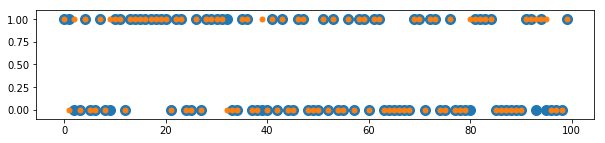

In [19]:
pl.figure(figsize=(10,2))
pl.scatter(range(100),y_test5[:100],s=100)
pl.scatter(range(100),
           y_test5_predictions[:100],s=25);

In [20]:
basic_model.input,basic_model.outputs

(<tf.Tensor 'dense_1_input:0' shape=(?, 2) dtype=float32>,
 [<tf.Tensor 'activation_2/Sigmoid:0' shape=(?, 1) dtype=float32>])

In [21]:
basic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [22]:
basic_model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'units': 16,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Activation',
   'config': {'name': 'activation_1',
    'trainable': True,
    'activation': 'relu'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'units': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      '

In [23]:
basic_model.get_weights()

[array([[ 0.09989449, -0.82467943,  1.0277566 , -0.7888009 , -0.76656765,
          1.2098497 , -0.55226815, -0.6074144 , -0.1496748 ,  0.14611025,
         -0.548346  , -0.32136297,  0.7436786 , -0.42324612, -0.4602708 ,
         -0.8182742 ],
        [ 1.092713  , -0.10277811, -1.0315161 , -0.11686463, -0.13352613,
         -1.1853361 , -0.11352145, -0.09183056,  0.02921013,  1.0350581 ,
          0.12120517, -0.15471831, -1.0738974 , -0.07041122, -0.49178293,
         -0.07355714]], dtype=float32),
 array([ 0.19565818,  0.40406176, -0.1219501 ,  0.45665196,  0.43992752,
        -0.15389676,  0.4860416 ,  0.5277607 ,  0.31235722,  0.21032019,
         0.5964936 , -0.07357097, -0.09750104,  0.57874435, -0.2776869 ,
         0.42888752], dtype=float32),
 array([[ 0.7758376 ],
        [-0.4648671 ],
        [ 0.79578674],
        [-0.37218508],
        [-0.683212  ],
        [ 0.80685014],
        [-0.7254242 ],
        [-0.4109486 ],
        [-0.5407318 ],
        [ 0.77974176],
      

In [24]:
# Save/reload models
# basic_model.save('basic_model.h5')
# basic_model=load_model('basic_model.h5')

In [25]:
# Save/reload weights
# basic_model.save_weights('basic_model_weights.h5')
# basic_model.load_weights('basic_model_weights.h5',by_name=False)

In [26]:
# Choose optimization
optimizer=ks.optimizers.Nadam(lr=.005,beta_1=.99,beta_2=.9999,
                              epsilon=None,schedule_decay=.005)
basic_model=Sequential([Dense(16,input_dim=2),Activation('relu'),
                        Dense(1),Activation('sigmoid')])
basic_model.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
basic_model.fit(x_train5,y_train5, 
                validation_data=(x_valid5,y_valid5), 
                epochs=100,batch_size=128,verbose=0)
basic_model.evaluate(x_test5,y_test5)

500/500 [==============================] - 0s 38us/step


[0.12676873236894606, 0.95]

In [27]:
# Improve activation
inp=Input(shape=(2,))
act=ks.layers.LeakyReLU(alpha=.4)
lay=act(Dense(16,name='encoder')(inp))
out=Dense(1,activation='sigmoid',
          name='decoder')(lay)
basic_model=Model(inputs=inp,outputs=out,name='cae')
basic_model.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
basic_model.fit(x_train5, y_train5, 
                validation_data=(x_valid5,y_valid5), 
                epochs=100,batch_size=128,verbose=0)
basic_model.evaluate(x_test5,y_test5)

500/500 [==============================] - 0s 43us/step


[0.12707667309045792, 0.952]

In [28]:
# Use callbacks
fw='weights.best.hdf5'
early_stopping=EarlyStopping(monitor='val_loss',patience=20)
checkpointer=ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',
                               patience=5,factor=.5)
basic_model=Model(inputs=inp,outputs=out,name='cae')
basic_model.compile(optimizer=optimizer,
                    loss='binary_crossentropy',metrics=['accuracy'])
basic_model.fit(x_train5,y_train5,
                validation_data=(x_valid5,y_valid5),
                epochs=200,batch_size=128,verbose=0, 
                callbacks=[early_stopping,checkpointer,lr_reduction])
basic_model.load_weights(fw)
basic_model.evaluate(x_test5,y_test5)

500/500 [==============================] - 0s 41us/step


[0.1264621537923813, 0.958]

<h1 style="color:#ff603b; font-family:Ewert; font-size:120%;" class="font-effect-3d">Multi-Layer Perceptrons</h1>

In [29]:
# Reshape image arrays
x_train6=(x_train6).reshape(-1,150*150)
x_valid6=(x_valid6).reshape(-1,150*150)
x_test6=(x_test6).reshape(-1,150*150)

In [30]:
# Multi-Class Classification
def model():
    model=Sequential()    
    model.add(Dense(128,activation='relu',
                    input_shape=(150*150,)))
    model.add(Dropout(.1))    
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(.1))    
    model.add(Dense(15,activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',metrics=['accuracy'])
    return model
model=model()
checkpointer=ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',
                               patience=5,verbose=2,factor=.5)
history=model.fit(x_train6,c_y_train6,
                  validation_data=(x_valid6,c_y_valid6),
                  epochs=70,batch_size=64,verbose=0,
                  callbacks=[checkpointer,lr_reduction])
model.load_weights(fw)
model.evaluate(x_test6,c_y_test6)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00040: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00050: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00055: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00060: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00065: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00070: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
17/17 [==============================] - 0s 209us/step


[0.37749895453453064, 0.8823529481887817]

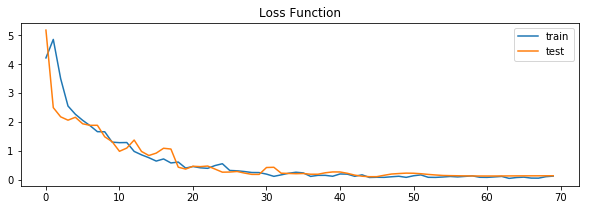

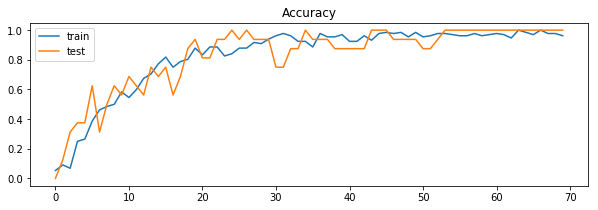

In [31]:
loss_plot(history); acc_plot(history)

In [32]:
# Regression
def model():
    model=Sequential()    
    model.add(Dense(52,activation='relu',
                    input_shape=(13,)))    
    model.add(Dense(52,activation='relu'))     
    model.add(Dense(208,activation='relu'))
    model.add(Dense(208,activation='relu'))    
    model.add(Dense(832,activation='relu'))    
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',
                  loss='mse',metrics=['mae'])     
    return model

model=model()
checkpointer=ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',
                               patience=5,verbose=2,factor=.5)
history=model.fit(x_train4,y_train4,
                  validation_data=(x_valid4,y_valid4),
                  epochs=100,batch_size=16,verbose=0,
                  callbacks=[checkpointer,lr_reduction])
model.load_weights(fw)
model.evaluate(x_test4,y_test4)


Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00038: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00044: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00049: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00054: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 00059: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 00064: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 00069: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 00074: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 00079: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 00084: ReduceLROnPl

[45.06479824290556, 4.826982853459377]

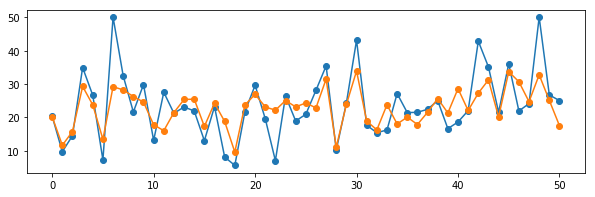

In [33]:
y_test4_predictions=model.predict(x_test4)
pl.figure(figsize=(10,3))
pl.plot(range(len(y_test4)),y_test4,'-o',
        label='real data')
pl.plot(range(len(y_test4)),y_test4_predictions,'-o',
        label='predictions');

In [34]:
# Text Classification
def model():
    model=Sequential()    
    model.add(Dense(128,activation='relu',
                    input_shape=(101322,)))
    model.add(Dropout(rate=.1))    
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(rate=.1))    
    model.add(Dense(20,activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model=model()
early_stopping=EarlyStopping(monitor='val_loss',patience=20)
checkpointer=ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',
                               patience=5,verbose=2,factor=.8)
history=model.fit(x_train3,c_y_train3,
                  validation_data=(x_valid3,c_y_valid3),
                  epochs=30,batch_size=128,verbose=0,
                  callbacks=[early_stopping,checkpointer,lr_reduction])


Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.

Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0006400000303983689.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0005120000336319208.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.00040960004553198815.


3766/3766 [==============================] - 2s 409us/step


[1.021590830794814, 0.6994158259364942]

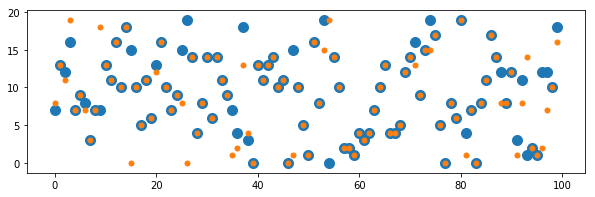

In [35]:
model.load_weights(fw)
y_test3_predictions=model.predict_classes(x_test3)
pl.figure(figsize=(10,3))
pl.scatter(range(100),y_test3[:100],s=100)
pl.scatter(range(100),y_test3_predictions[:100],s=25)
model.evaluate(x_test3,c_y_test3)

<h1 style="color:#ff603b; font-family:Ewert; font-size:120%;" class="font-effect-3d">Convolutional Neural Networks</h1>

In [36]:
# VGG-like CNN: Multi-Class Classification
def model():
    model=Sequential()
    model.add(Conv2D(32,(5,5),padding='same',
                     input_shape=x_train8.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(5,5)))
    model.add(Activation('relu'))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.25))
    model.add(Conv2D(96,(5,5), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(5,5)))
    model.add(Activation('relu'))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.25))
    model.add(GlobalMaxPooling2D())    
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(.5))    
    model.add(Dense(33))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',metrics=['accuracy'])    
    return model

In [37]:
model=model()
estopping=EarlyStopping(monitor='val_loss',patience=20)
checkpointer=ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',
                               patience=5,verbose=2,factor=.8)
history=model.fit(x_train8,c_y_train8,
                  validation_data=(x_valid8,c_y_valid8),
                  epochs=50,batch_size=256,verbose=0,
                  callbacks=[checkpointer,lr_reduction,estopping])
model.load_weights(fw)
model.evaluate(x_test8,c_y_test8)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
1419/1419 [==============================] - 0s 73us/step


[0.35717823521783437, 0.8985200845665962]

In [38]:
steps,epochs=1000,5
data_generator=kimage\
.ImageDataGenerator(zoom_range=.2,rotation_range=20)
dg_history=\
model.fit_generator(data_generator.flow(x_train8,c_y_train8,
                                        batch_size=256),
                    steps_per_epoch=steps,epochs=epochs,verbose=2, 
                    validation_data=(x_valid8,c_y_valid8),
                    callbacks=[checkpointer,lr_reduction])

Epoch 1/5
 - 104s - loss: 0.7227 - acc: 0.7821 - val_loss: 0.2877 - val_acc: 0.9302
Epoch 2/5
 - 105s - loss: 0.5359 - acc: 0.8357 - val_loss: 0.2313 - val_acc: 0.9429
Epoch 3/5
 - 106s - loss: 0.4463 - acc: 0.8613 - val_loss: 0.1983 - val_acc: 0.9479
Epoch 4/5
 - 105s - loss: 0.3978 - acc: 0.8751 - val_loss: 0.1641 - val_acc: 0.9591
Epoch 5/5
 - 105s - loss: 0.3546 - acc: 0.8890 - val_loss: 0.1585 - val_acc: 0.9521


In [39]:
model.load_weights(fw)
model.evaluate(x_test8,c_y_test8)

1419/1419 [==============================] - 0s 113us/step


[0.16253642682209243, 0.9506694857632298]

In [40]:
# CNN: Regression
def model():
    model=Sequential()    
    model.add(Conv1D(52,5,padding='valid',
                     activation='relu',input_shape=(13,1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.2))
    model.add(Conv1D(208,3,padding='valid',
                     activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.2))    
    model.add(Flatten())
    model.add(Dense(1024,kernel_initializer='normal',
                    activation='relu'))
    model.add(Dropout(.4))
    model.add(Dense(1, kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model    

In [41]:
model=model()
estopping=EarlyStopping(monitor='val_loss',patience=20)
checkpointer=ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',
                               patience=5,verbose=2,factor=.95)
history=model.fit(x_train4.reshape(-1,13,1),y_train4, 
                  validation_data=(x_valid4.reshape(-1,13,1),
                                   y_valid4),
                    epochs=300,batch_size=16,verbose=0,
                    callbacks=[checkpointer,lr_reduction,estopping])
model.load_weights(fw)
model.evaluate(x_test4.reshape(-1,13,1),y_test4)


Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0009500000451225787.

Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.0009025000152178108.

Epoch 00020: ReduceLROnPlateau reducing learning rate to 0.0008573750033974647.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0008145062311086804.
51/51 [==============================] - 0s 158us/step


[88.58877114688649, 7.316962391722436]

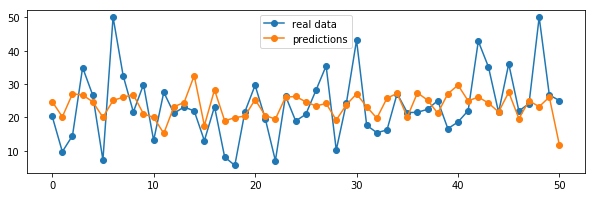

In [42]:
y_test4_predictions=\
model.predict(x_test4.reshape(-1,13,1))
pl.figure(figsize=(10,3))
pl.plot(range(len(y_test4)),y_test4,'-o',
        label='real data')
pl.plot(range(len(y_test4)),
        y_test4_predictions,'-o',
        label='predictions')
pl.legend();

<h1 style="color:#ff603b; font-family:Ewert; font-size:120%;" class="font-effect-3d">Recurrent Neural Networks</h1>

In [43]:
# RNN: Multi-Class Classification
def model():
    model=Sequential()
    model.add(LSTM(112,return_sequences=True,
                   input_shape=(1,784)))    
    model.add(LSTM(112,return_sequences=True)) 
    model.add(LSTM(112))      
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='nadam',metrics=['accuracy'])    
    return model 

In [44]:
model=model()
estopping=EarlyStopping(monitor='val_loss',patience=20)
checkpointer=ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',
                               patience=5,verbose=2,factor=.5)
history=model.fit(x_train2.reshape(-1,1,784),c_y_train2, 
                  validation_data=(x_valid2.reshape(-1,1,784),
                                   c_y_valid2),
                  epochs=10,batch_size=128,verbose=0,
                  callbacks=[checkpointer,lr_reduction,estopping])
model.load_weights(fw)
model.evaluate(x_test2.reshape(-1,1,784),c_y_test2)

5000/5000 [==============================] - 1s 130us/step


[0.2039924985229969, 0.934]

In [45]:
# RNN: Regression
def model():
    model=Sequential()    
    model.add(LSTM(52,return_sequences=True,
                   input_shape=(1,13)))
    model.add(LSTM(208,return_sequences=False))       
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',
                  loss='mse',metrics=['mae'])  
    return model 

In [46]:
model=model()
estopping=EarlyStopping(monitor='val_loss',patience=20)
checkpointer=ModelCheckpoint(filepath=fw,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',
                               patience=5,verbose=2,factor=.95)
history=model.fit(x_train4.reshape(-1,1,13),y_train4, 
                  validation_data=(x_valid4.reshape(-1,1,13),
                                   y_valid4),
                  epochs=400,batch_size=16,verbose=0,
                  callbacks=[checkpointer,estopping,lr_reduction])
model.load_weights(fw)
model.evaluate(x_test4.reshape(-1,1,13),y_test4)


Epoch 00057: ReduceLROnPlateau reducing learning rate to 0.0009500000451225787.

Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.0009025000152178108.

Epoch 00067: ReduceLROnPlateau reducing learning rate to 0.0008573750033974647.

Epoch 00072: ReduceLROnPlateau reducing learning rate to 0.0008145062311086804.
51/51 [==============================] - 0s 195us/step


[65.89607493082683, 5.904718922633751]

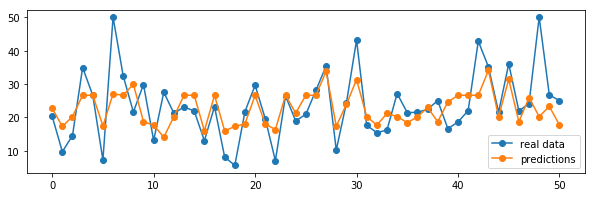

In [47]:
y_test4_predictions=\
model.predict(x_test4.reshape(-1,1,13))
pl.figure(figsize=(10,3))
pl.plot(range(len(y_test4)),y_test4,'-o',
        label='real data')
pl.plot(range(len(y_test4)),y_test4_predictions,
        '-o',label='predictions')
pl.legend();

<h1 style="color:#ff603b; font-family:Ewert; font-size:120%;" class="font-effect-3d">Applications</h1>

In [48]:
# ResNet50
fn = '../input/resnet50/'+\
'resnet50_weights_tf_dim_ordering_tf_kernels.h5'
resnet50_model=ks.applications.resnet50\
.ResNet50(weights=fn)

In [49]:
fn2='../input/image-examples-for-mixed-styles/cat.png'
fn3='../input/resnet50/imagenet_class_index.json'
cat_image=kimage.load_img(fn2,target_size=(224,224))
CLASS_INDEX=None
def decode_predictions(preds,fpath,top=5):
    global CLASS_INDEX
    if len(preds.shape)!=2 or preds.shape[1]!=1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: '+str(preds.shape))
    if CLASS_INDEX is None:
        CLASS_INDEX=json.load(open(fpath))
    results=[]
    for pred in preds:
        top_indices=pred.argsort()[-top:][::-1]
        result=[tuple(CLASS_INDEX[str(i)])+(pred[i],) 
                for i in top_indices]
        results.append(result)
    return results

Predictions:
 [('n02120505', 'grey_fox', 0.20489316), ('n02120079', 'Arctic_fox', 0.17673324), ('n02123394', 'Persian_cat', 0.15682295), ('n02119022', 'red_fox', 0.056277525), ('n02123045', 'tabby', 0.05580891)]


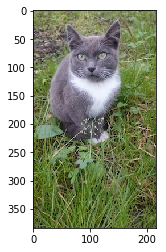

In [50]:
x=kimage.img_to_array(cat_image)
x=np.expand_dims(x,axis=0)
x=ks.applications.resnet50.preprocess_input(x)
cat_predictions=resnet50_model.predict(x)
print('Predictions:\n',
      decode_predictions(cat_predictions,fn3)[0])
cv_cat_image=cv2.imread(fn2)
rgb_cat_image=\
cv2.cvtColor(cv_cat_image,cv2.COLOR_BGR2RGB)
pl.imshow(rgb_cat_image);

In [51]:
# InceptionV3
fn='../input/keras-applications-weights/'+\
'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
iv3_base_model=\
ks.applications.InceptionV3(weights=fn,
                            include_top=False)
x=iv3_base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
y=Dense(10,activation='softmax')(x)
iv3_model=Model(inputs=iv3_base_model.input,
                outputs=y)

In [52]:
# Freeze InceptionV3 convolutional layers
for layer in iv3_base_model.layers:
    layer.trainable =False
iv3_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    

In [53]:
# Train
steps,epochs=189,10
data_generator=kimage\
.ImageDataGenerator(shear_range=.2,zoom_range=.2,
                    horizontal_flip=True)
checkpointer=\
ModelCheckpoint(filepath=fw,verbose=2,
                save_best_only=True)
lr_reduction=\
ReduceLROnPlateau(monitor='val_loss',
                  patience=5,verbose=2,factor=.5)
history=iv3_model.fit_generator(data_generator\
.flow(x_train7,c_y_train7,batch_size=64),\
steps_per_epoch=steps,epochs=epochs,\
callbacks=[checkpointer,lr_reduction],\
validation_data=(x_valid7,c_y_valid7))

Epoch 1/10
189/189 [==============================] - 49s 261ms/step - loss: 0.4550 - acc: 0.8738 - val_loss: 5.0604 - val_acc: 0.4000

Epoch 00001: val_loss improved from inf to 5.06036, saving model to weights.best.hdf5
Epoch 2/10
189/189 [==============================] - 42s 221ms/step - loss: 0.1303 - acc: 0.9630 - val_loss: 5.0237 - val_acc: 0.5000

Epoch 00002: val_loss improved from 5.06036 to 5.02373, saving model to weights.best.hdf5
Epoch 3/10
189/189 [==============================] - 44s 233ms/step - loss: 0.0871 - acc: 0.9735 - val_loss: 6.0514 - val_acc: 0.4000

Epoch 00003: val_loss did not improve from 5.02373
Epoch 4/10
189/189 [==============================] - 43s 227ms/step - loss: 0.0769 - acc: 0.9780 - val_loss: 7.3304 - val_acc: 0.3000

Epoch 00004: val_loss did not improve from 5.02373
Epoch 5/10
189/189 [==============================] - 44s 233ms/step - loss: 0.0643 - acc: 0.9804 - val_loss: 8.1585 - val_acc: 0.2000

Epoch 00005: val_loss did not improve from

In [54]:
# Unfreeze InceptionV3 convolutional layers
for layer in iv3_model.layers[:173]:
    layer.trainable=False
for layer in iv3_model.layers[173:]:
    layer.trainable=True
iv3_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])  

In [55]:
# Train
history=iv3_model.fit_generator(data_generator\
.flow(x_train7,c_y_train7,batch_size=64),\
steps_per_epoch=steps,epochs=epochs,\
callbacks=[checkpointer,lr_reduction],\
validation_data=(x_valid7,c_y_valid7))

Epoch 1/10
189/189 [==============================] - 60s 317ms/step - loss: 0.1511 - acc: 0.9809 - val_loss: 4.5549 - val_acc: 0.4000

Epoch 00001: val_loss improved from 5.02373 to 4.55488, saving model to weights.best.hdf5
Epoch 2/10
189/189 [==============================] - 46s 243ms/step - loss: 0.3091 - acc: 0.9791 - val_loss: 2.0436 - val_acc: 0.6000

Epoch 00002: val_loss improved from 4.55488 to 2.04358, saving model to weights.best.hdf5
Epoch 3/10
189/189 [==============================] - 47s 250ms/step - loss: 0.2837 - acc: 0.9819 - val_loss: 2.0425 - val_acc: 0.6000

Epoch 00003: val_loss improved from 2.04358 to 2.04247, saving model to weights.best.hdf5
Epoch 4/10
189/189 [==============================] - 47s 250ms/step - loss: 0.3044 - acc: 0.9800 - val_loss: 2.4893 - val_acc: 0.6000

Epoch 00004: val_loss did not improve from 2.04247
Epoch 5/10
189/189 [==============================] - 49s 257ms/step - loss: 0.2639 - acc: 0.9815 - val_loss: 12.1305 - val_acc: 0.2000

In [56]:
# Evaluate 
iv3_model.load_weights(fw)
iv3_test_scores=\
iv3_model.evaluate(x_test7,c_y_test7)
print("Accuracy: %.2f%%"%(iv3_test_scores[1]*100))

11/11 [==============================] - 0s 15ms/step
Accuracy: 90.91%
